# Final Project - Attractor Reconstruction - Lorenz and Rossler Attractors
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Prof. Elbert E. N. Macau

Author: Rafael Leiniö


## Algorithm Implementations

- [Lorenz Map Generator](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/series_generator/lorenz_map_generator.py)
- [Rossler Map Generator](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/series_generator/rossler_map_generator.py)
- [Lyapunov Exponents](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/maps/lyapunov_exponents.py)


In [1]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

In [2]:
# imports
import numpy as np
import pylab as pl
import pandas as pd
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import itertools

In [3]:
# functions
def remove_warm_up_points(cap=500, *series):
    return [xs[cap:] for xs in series]

def get_max_min_values(series):
    return max(series), min(series)

def create_series_from_generator(generator, n=10000, warmup=2000):
    return remove_warm_up_points(warmup, *generator.generate_series(n))

def get_series_reconstruction(series, m, delay):
    mapped_series = []
    n = len(series)
    for i in range(n):
        try:
            window_points = [series[i + delay * j] for j in range(m)]
            mapped_series.append(window_points)
        except IndexError:
            return zip(*mapped_series)

# viz
plt.figure(figsize=(20, 20))

def plot_xs(xs):
    plt.plot(xs)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

## Lorenz Reconstruction

### Original Lorenz Orbit

In [4]:
from ntsa.algorithms.series_generator.lorenz_map_generator import LorenzMapMapGenerator

xs, ys, zs = create_series_from_generator(LorenzMapMapGenerator(), n=10000, warmup=2000)

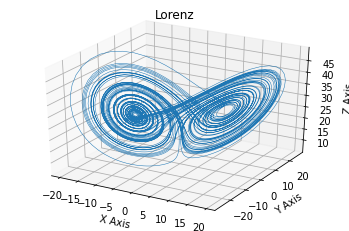

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

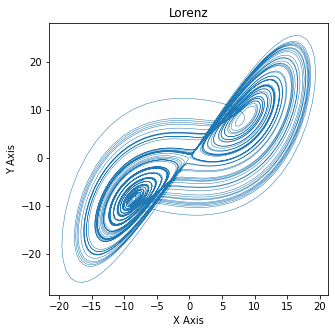

In [6]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(xs, ys, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz")

plt.show()

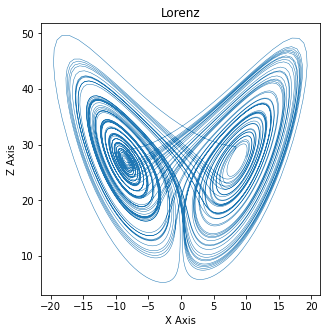

In [7]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(xs, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

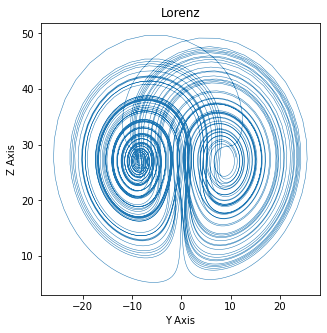

In [8]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(ys, zs, lw=0.5)
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

### Dimension 2 Reconstructions

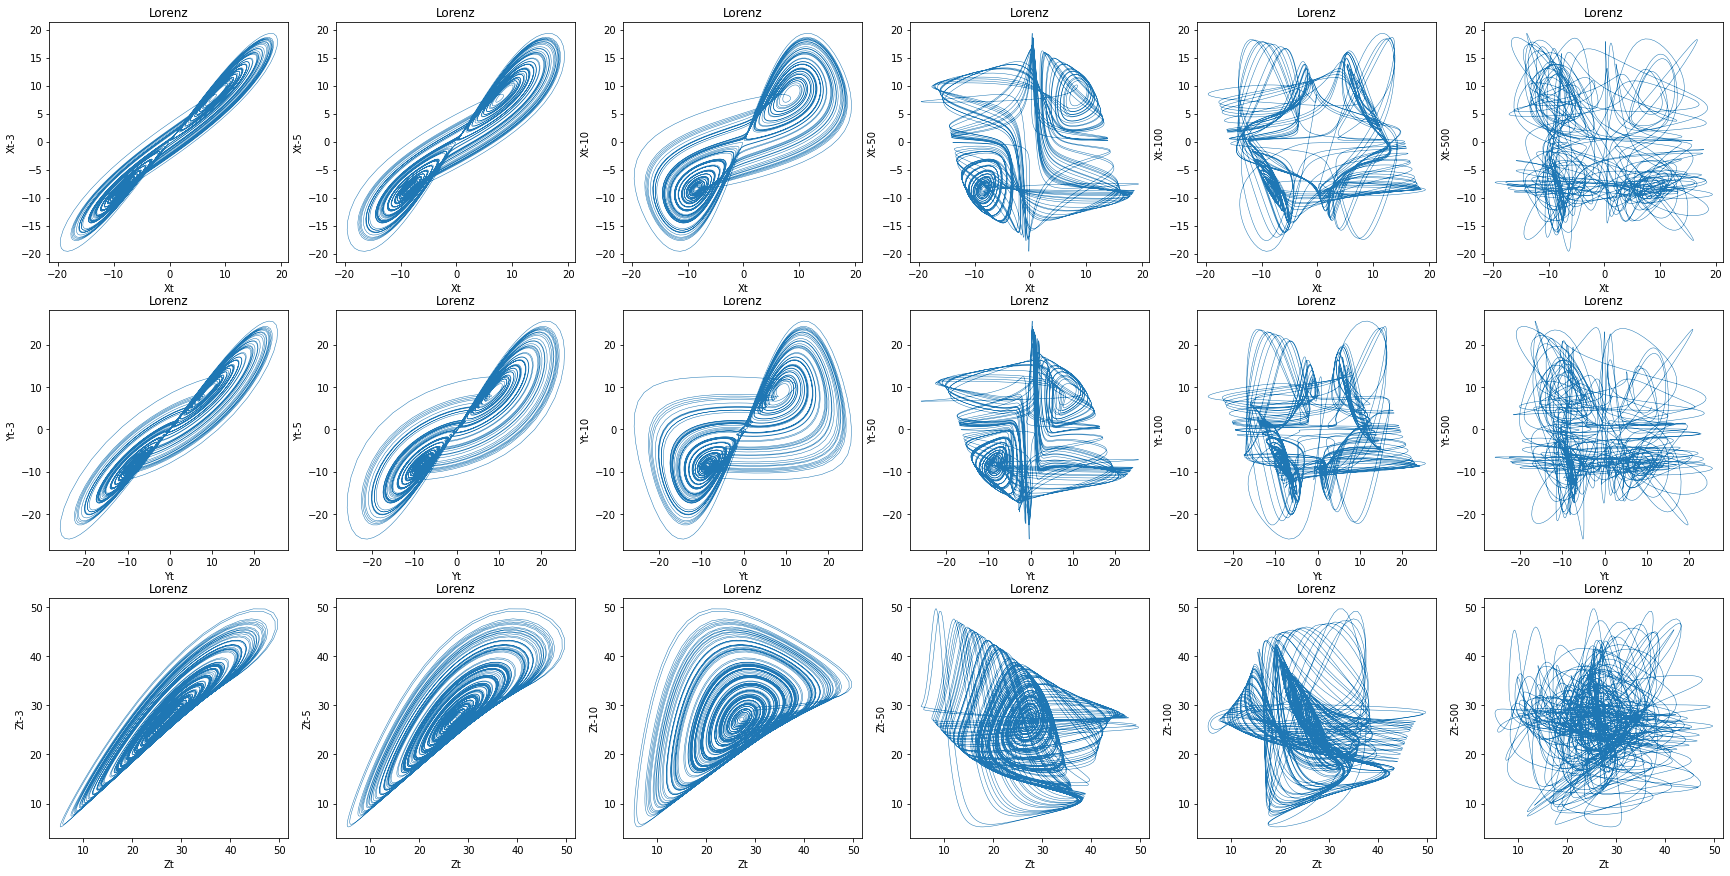

In [9]:
fig, axes = plt.subplots(3, 6, figsize=(30, 15), sharex=False, sharey=False)

delays = [3, 5, 10, 50, 100, 500]

# reconstruction from xs
for ax, delay in zip(axes[0], delays):
    new_xs, new_ys = get_series_reconstruction(xs, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Xt")
    ax.set_ylabel(f"Xt-{delay}")
    ax.set_title("Lorenz")

# reconstruction from ys
for ax, delay in zip(axes[1], delays):
    new_xs, new_ys = get_series_reconstruction(ys, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Yt")
    ax.set_ylabel(f"Yt-{delay}")
    ax.set_title("Lorenz")

# reconstruction from zs
for ax, delay in zip(axes[2], delays):
    new_xs, new_ys = get_series_reconstruction(zs, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Zt")
    ax.set_ylabel(f"Zt-{delay}")
    ax.set_title("Lorenz")

### Dimension 3 Reconstructions

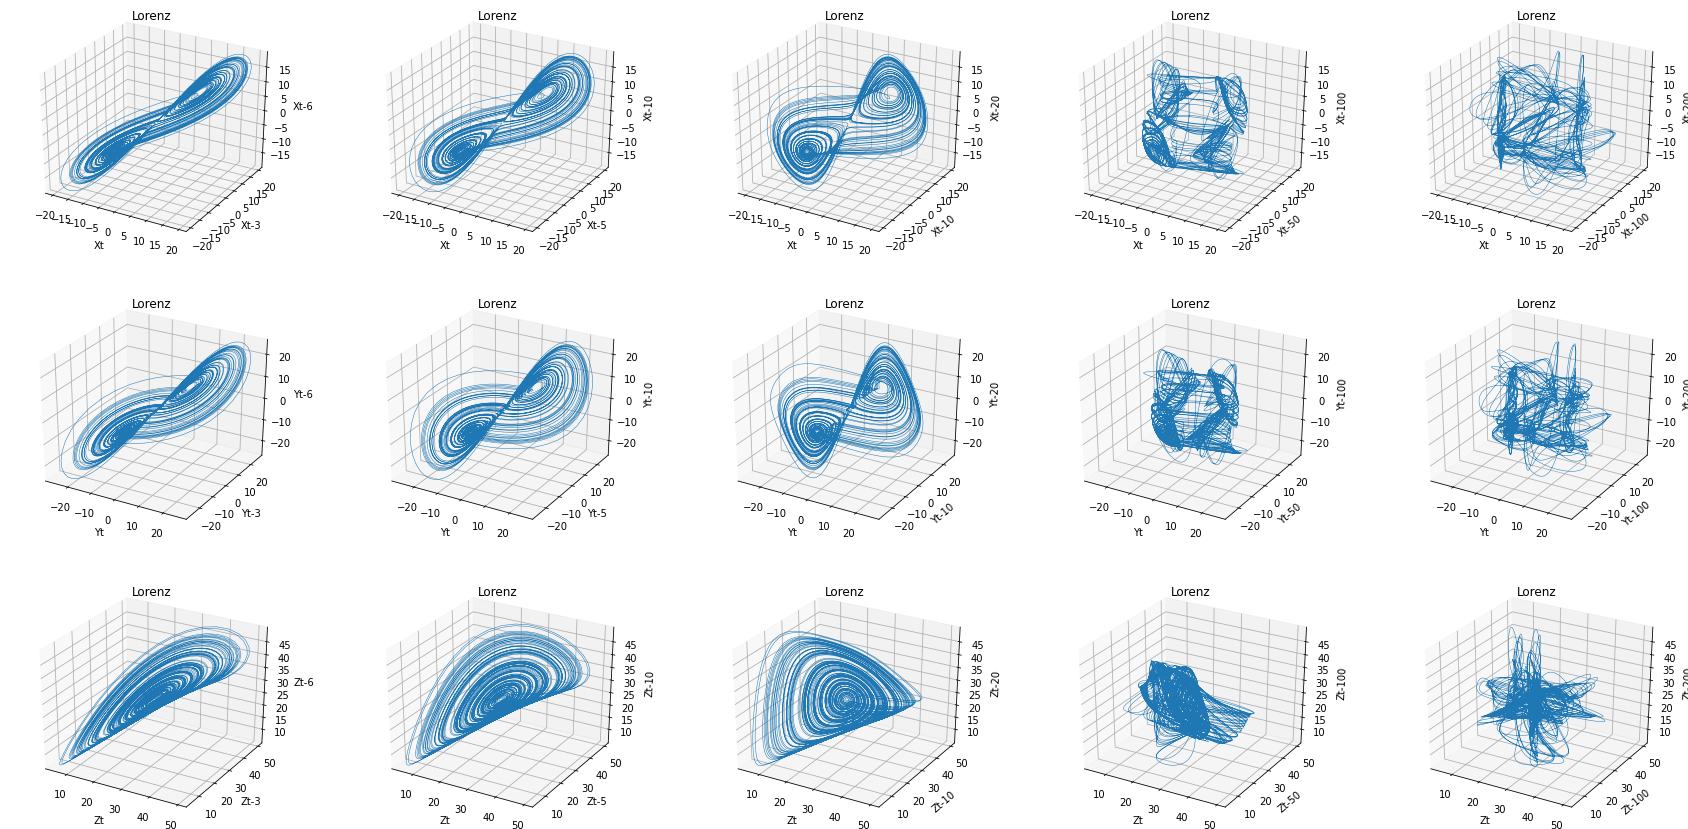

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(30, 15), sharex=False, sharey=False, subplot_kw=dict(projection='3d'))

delays = [3, 5, 10, 50, 100]

# reconstruction from xs
for ax, delay in zip(axes[0], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(xs, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Xt")
    ax.set_ylabel(f"Xt-{delay}")
    ax.set_zlabel(f"Xt-{2*delay}")
    ax.set_title("Lorenz")

# reconstruction from ys
for ax, delay in zip(axes[1], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(ys, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Yt")
    ax.set_ylabel(f"Yt-{delay}")
    ax.set_zlabel(f"Yt-{2*delay}")
    ax.set_title("Lorenz")

# reconstruction from zs
for ax, delay in zip(axes[2], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(zs, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Zt")
    ax.set_ylabel(f"Zt-{delay}")
    ax.set_zlabel(f"Zt-{2*delay}")
    ax.set_title("Lorenz")

### Lyapunov Exponents

In [11]:
# calculating Lyapunov Exponents for Lorenz map, with sigma=10, rho=28 and beta=8/3
# with starting x=0, y=2, z=0

from ntsa.algorithms.maps import Lorenz
from ntsa.algorithms.maps import LyapunovExponents

lorenz_map = Lorenz(sigma=10, rho=28, beta=8 / 3)

starting_point = [0, 2, 0]

solver = LyapunovExponents(lorenz_map, tolerance=0.0001, max_iterations=10000)

In [12]:
solver.calculate_from_initial_conditions(starting_point)

array([-1.45699626e+01,  2.04232901e-03,  9.01254207e-01])

## Rossler Reconstruction

### Original Rossler Orbit

In [17]:
from ntsa.algorithms.series_generator.rossler_map_generator import RosslerMapGenerator

xs, ys, zs = create_series_from_generator(RosslerMapGenerator(), n=20000, warmup=2000)

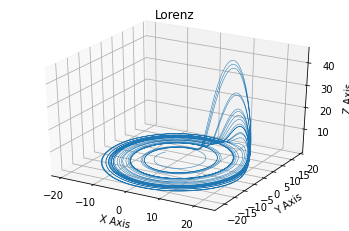

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

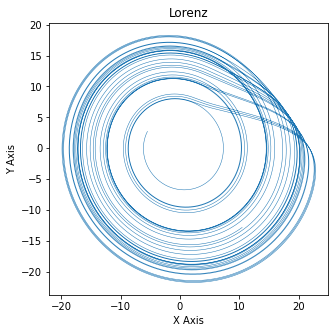

In [19]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(xs, ys, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz")

plt.show()

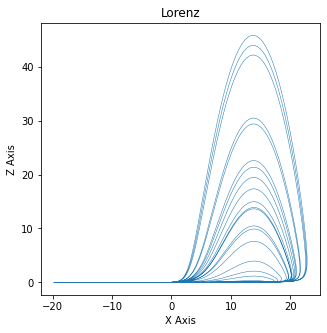

In [20]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(xs, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

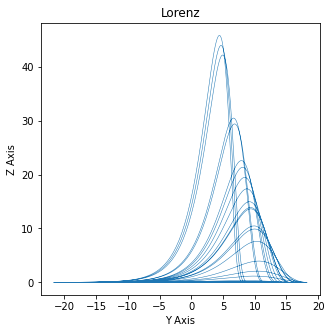

In [21]:
_, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True, sharey=True)

ax.plot(ys, zs, lw=0.5)
ax.set_xlabel("Y Axis")
ax.set_ylabel("Z Axis")
ax.set_title("Lorenz")

plt.show()

### Dimension 2 Reconstructions

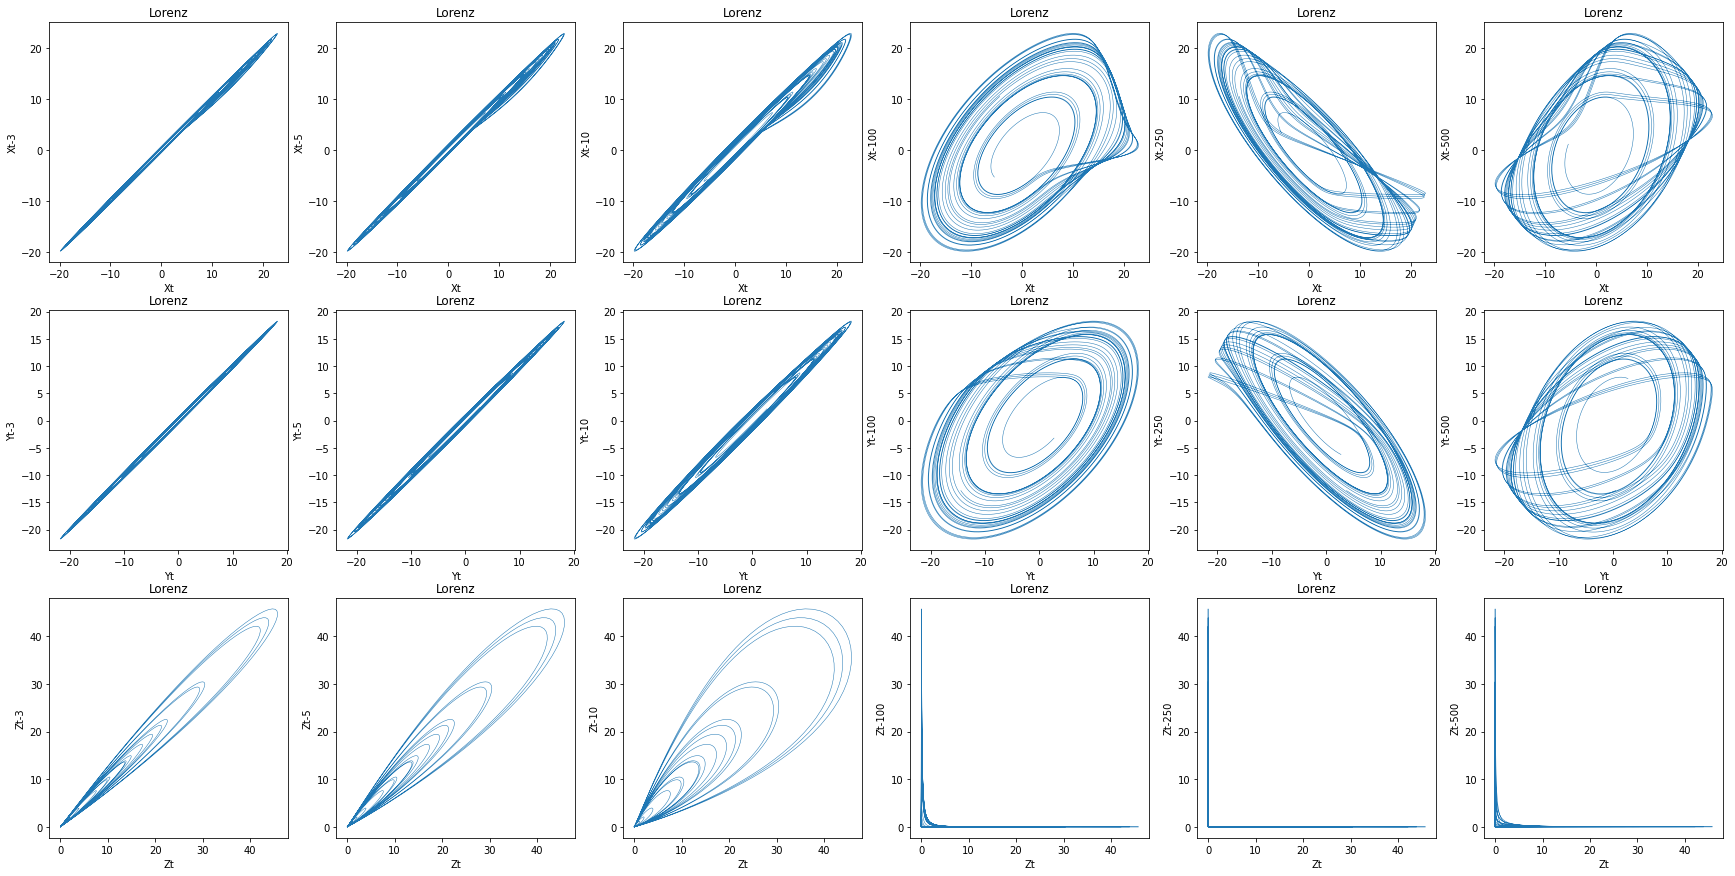

In [22]:
fig, axes = plt.subplots(3, 6, figsize=(30, 15), sharex=False, sharey=False)

delays = [3, 5, 10, 100, 250, 500]

# reconstruction from xs
for ax, delay in zip(axes[0], delays):
    new_xs, new_ys = get_series_reconstruction(xs, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Xt")
    ax.set_ylabel(f"Xt-{delay}")
    ax.set_title("Rossler")

# reconstruction from ys
for ax, delay in zip(axes[1], delays):
    new_xs, new_ys = get_series_reconstruction(ys, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Yt")
    ax.set_ylabel(f"Yt-{delay}")
    ax.set_title("Rossler")

# reconstruction from zs
for ax, delay in zip(axes[2], delays):
    new_xs, new_ys = get_series_reconstruction(zs, m=2, delay=delay)
    ax.plot(new_xs, new_ys, lw=0.5)
    ax.set_xlabel("Zt")
    ax.set_ylabel(f"Zt-{delay}")
    ax.set_title("Rossler")

### Dimension 3 Reconstructions

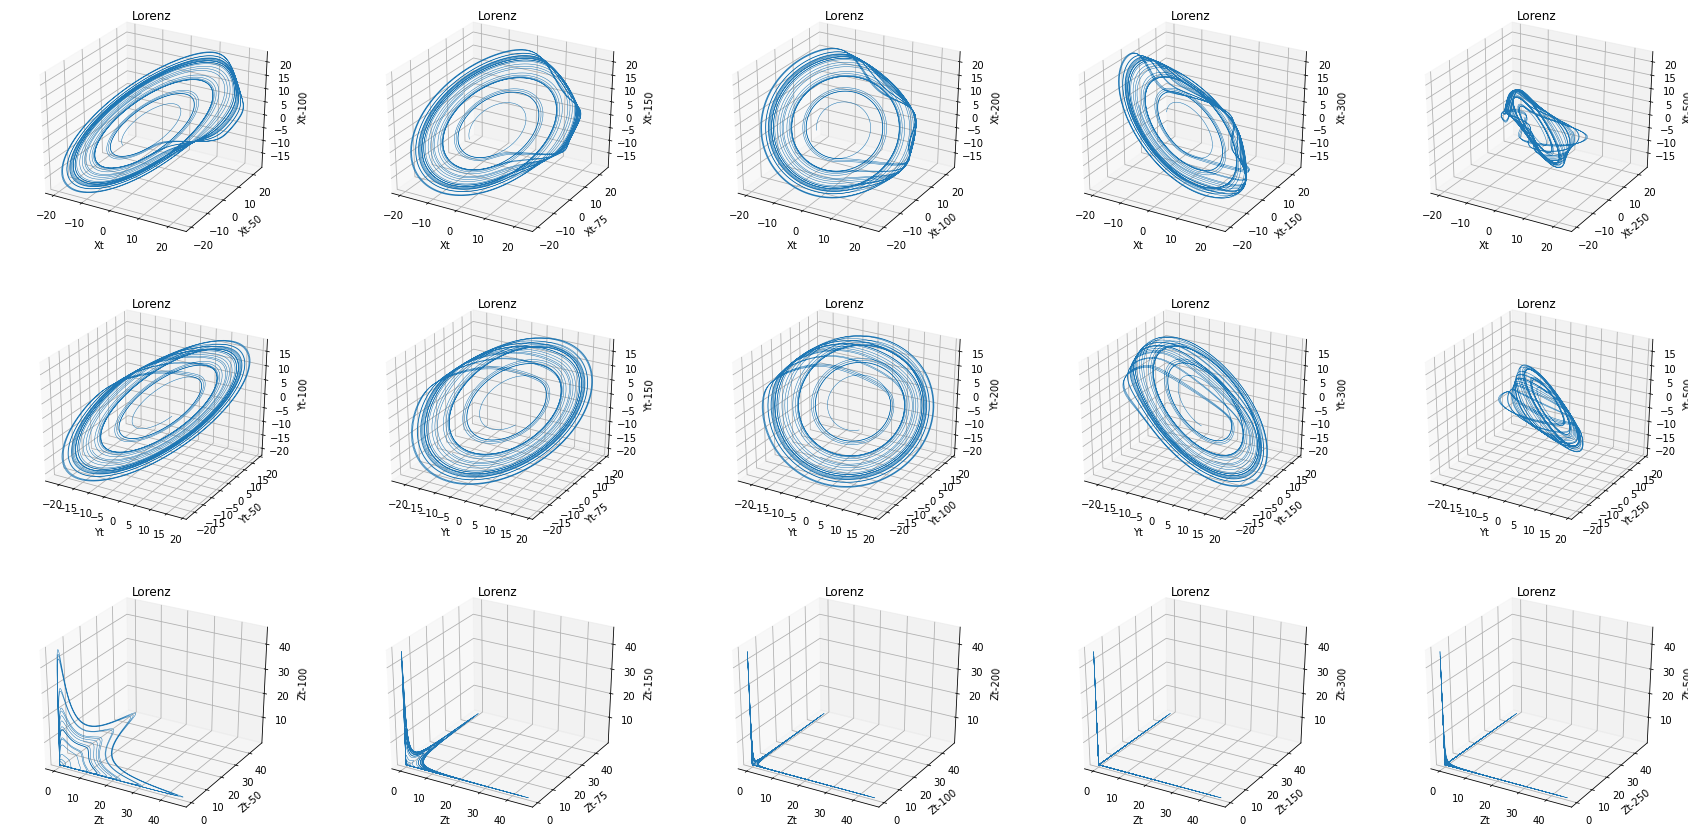

In [28]:
fig, axes = plt.subplots(3, 5, figsize=(30, 15), sharex=False, sharey=False, subplot_kw=dict(projection='3d'))

delays = [50, 75, 100, 150, 250]

# reconstruction from xs
for ax, delay in zip(axes[0], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(xs, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Xt")
    ax.set_ylabel(f"Xt-{delay}")
    ax.set_zlabel(f"Xt-{2*delay}")
    ax.set_title("Rossler")

# reconstruction from ys
for ax, delay in zip(axes[1], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(ys, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Yt")
    ax.set_ylabel(f"Yt-{delay}")
    ax.set_zlabel(f"Yt-{2*delay}")
    ax.set_title("Rossler")

# reconstruction from zs
for ax, delay in zip(axes[2], delays):
    new_xs, new_ys, new_zs = get_series_reconstruction(zs, m=3, delay=delay)
    ax.plot(new_xs, new_ys, new_zs, lw=0.5)
    ax.set_xlabel("Zt")
    ax.set_ylabel(f"Zt-{delay}")
    ax.set_zlabel(f"Zt-{2*delay}")
    ax.set_title("Rossler")

### Lyapunov Exponents

In [26]:
# calculating Lyapunov Exponents for Rössler map, with a=0.1, b=0.1 and c=14
# with starting x=0, y=2, z=1

from ntsa.algorithms.maps import Rossler

rossler_map = Rossler(a=0.1, b=0.1, c=14)

starting_point = [0, 2, 1]

solver = LyapunovExponents(rossler_map, tolerance=0.0001, max_iterations=10000)

In [27]:
solver.calculate_from_initial_conditions(starting_point)

array([ 0.06611168,  0.07243824, 14.05875559])